# Comparing the Performance of a Decision Tree Classifier
## Criterion: Entropy and Gini Index


When building a decision tree classifier to model a data set (such as iris data), the goal is to maximize the information gained after the data is split into two nodes. Information gained can be calculated using two different criterion: (1) entropy and (2) the gini index. Both criterion are supported by the decision tree classifier class in sklearn.

\begin{gather*}
entropy= \sum_n p_n * log_2 ( p_n)\\
gini \: index = 1 - \sum_n p_n^2\\
p_n= probability
\end{gather*}

## Performance Metrics: Mean Absolute Error (MAE) and Mean Squared Error (MSE)

Once a model is determined from the training data, using a specific criterion, it need to be evalued based on how close its predctions are to the validation data. "Closeness" can be determined using two different metrics: (1) Mean Absolute Error (MAE) and (2) mean squared error (MSE). Let $x_i$ be the predicted value, $y_i$ be the true value, and $N$ be the total number of data points. 

\begin{gather*}
MAE=\frac{1}{N} \sum_{n=1}^N|y_i - x_i|\\
MSE=\frac{1}{N} \sum_{n=1}^N(y_i - x_i)^2
\end{gather*}

In [14]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X, y = iris.data, iris.target
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, y)

Alternatively the iris dataset can be imported into a DataFrame from a CSV file using Pandas. We are not going to the data analysis with Pandas Data Frame. We will print it out for visualization purposes.

In [15]:
import pandas as pd
import numpy as np

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
#data = pd.read_csv('GitHub_Iris.csv')
data = pd.read_csv('Kaggle_Iris.csv', index_col='Id')

data.tail()

#data.iloc[:, -1].value_counts()


#X = data.iloc[:, :-1]
#y = data.iloc[:, -1:]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


## Split into Training and Validation Datasets

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size=0.33)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

## criterion='gini'

In [4]:
model_gini = tree.DecisionTreeClassifier(criterion='gini' , random_state=1)
model_gini.fit(train_X, train_y)

gini_val_predictions = model_gini.predict(val_X)

gini_MAE = mean_absolute_error(val_y, gini_val_predictions)
gini_MSE = mean_squared_error(val_y, gini_val_predictions)

print('Mean absolute error is:' , gini_MAE)
print('Mean squared error is:' , gini_MSE)

Mean absolute error is: 0.02631578947368421
Mean squared error is: 0.02631578947368421


## criterion='entropy'

In [5]:
model_entropy = tree.DecisionTreeClassifier(criterion='entropy',random_state=1)
model_entropy.fit(train_X, train_y)

entropy_val_predictions = model_entropy.predict(val_X)

entropy_MAE = mean_absolute_error(val_y, entropy_val_predictions)
entropy_MSE = mean_squared_error(val_y, entropy_val_predictions)

print('Mean absolute error is:' , entropy_MAE)
print('Mean squared error is:' , entropy_MSE)

Mean absolute error is: 0.02631578947368421
Mean squared error is: 0.02631578947368421


# Summary

It is possible for the Mean Absolute Error and Mean Squared Error to be equal. Let begin by defining the error in the error in the $ith$ data point as $r_i = |y_i - x_i|$, and the error vector $r = [r_1,...,r_N]^T$. Where $x_i = predicted$ and $y_i = true \: value$. Then the Mean Absolute Error (MAE) and Mean Squared Error (MSE) can be written as 

\begin{gather*}
MAE=\frac{1}{N}\vec{1}^T r\\
MSE=\frac{1}{N}r^Tr .
\end{gather*}

Setting the $MAE=MSE$ leads to the following equation

\begin{gather*}
\left(r - \vec{1} \right)^Tr = 0.
\end{gather*}

Therefore, the $MAE=MSE$ if and only if $r=\vec{0},\vec{1}$. This argument follows the arguments maded by the stack exchange link below.

https://stats.stackexchange.com/questions/423514/can-rmse-and-mae-have-the-same-value


## Gini Error Analysis

In [6]:
gini_error = gini_val_predictions - val_y
#gini_error = val_y - gini_val_predictions

error_index_gini = gini_error.argmax()

print( 'The error vector the the gini index \n' , gini_error )
print( 'The error occured at index:\n ', error_index_gini)

The error vector the the gini index 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
The error occured at index:
  22


### Calculate MAE and MSE from the error vector.

In [7]:
from numpy import inner

N = len(gini_error)

MAE = gini_error.sum()/N
MSE = inner(gini_error, gini_error)/N

print(MAE,MSE)

0.02631578947368421 0.02631578947368421


## Entropy Error Analysis

In [8]:
entropy_error = entropy_val_predictions - val_y
#entropy_error = val_y - entropy_val_predictions

error_index_entropy = entropy_error.argmax()

print( 'The error vector for the entropoy \n' , entropy_error )
print( 'The error occured at index:\n ', error_index_entropy)

The error vector for the entropoy 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
The error occured at index:
  22


### Calculate MAE and MSE from error vector.

In [9]:
N = len(entropy_error)

MAE = entropy_error.sum()/N
MSE = inner(entropy_error, entropy_error)/N

print(MAE,MSE)

0.02631578947368421 0.02631578947368421


We can clearly see that the error vectors are very "close" to zero with the exception of one element. Calculating MSE and MAE direclty we again see that they are equal. This ultimatley the result of $1^2=1$, and the vectors having the same length.

# Decision Tree Visualization

For both the Gini Index and entropy criterion we see that the 

In [10]:
import dtreeviz

In [17]:
viz_model = dtreeviz.model(model_entropy, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

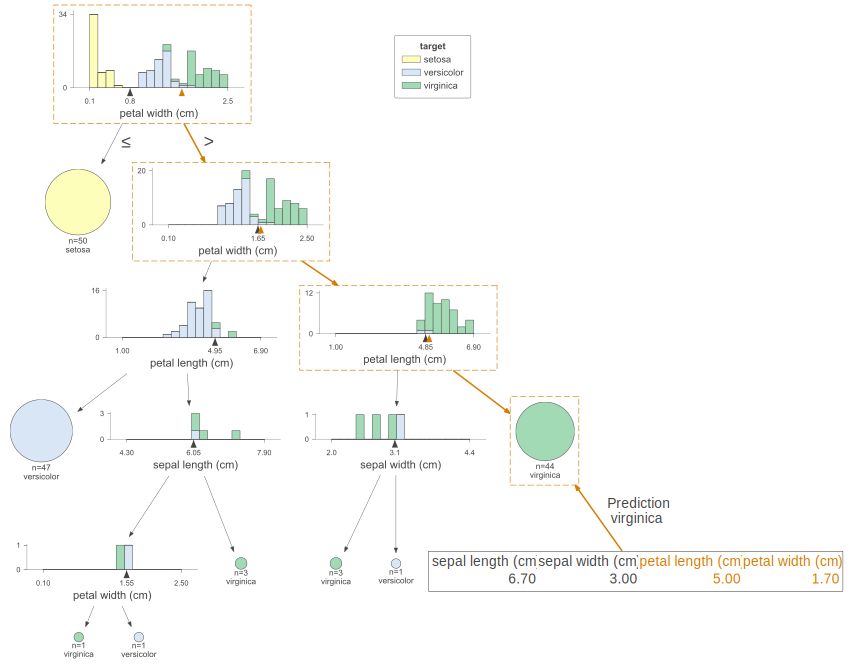

In [18]:
viz_model.view(x= val_X[error_index_entropy], scale=1.25)